In [76]:
import pandas as pd
from matplotlib import pyplot as plt

from notebooks.analytics.utils import init_analysis, set_save_folder
import seaborn as sns

declust_3 = init_analysis(f"daeclust_16-clusters-selection")
declust_3["label"] = "Tolerance 3"
declust_2 = init_analysis(f"daeclust_17_00-clusters-selection")
declust_2["label"] = "Tolerance 2"
declust_1 = init_analysis(f"daeclust_18_00-clusters-selection")
declust_1["label"] = "Tolerance 1"

set_save_folder("cluster_count")
all_selections = pd.concat([declust_3, declust_2, declust_1])

In [77]:
selection_cluster_count = all_selections.groupby(["round_id", "label"])["cluster_id"].nunique().rename("cluster_count")

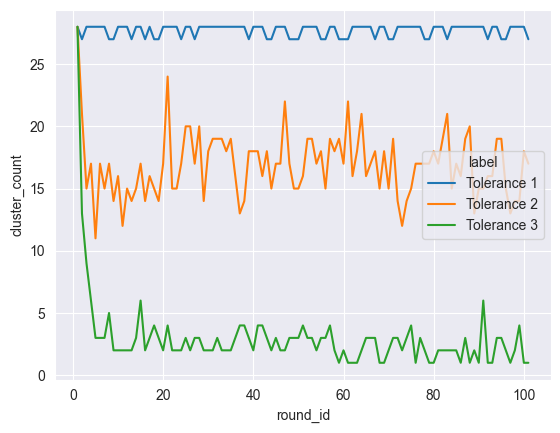

In [78]:
from notebooks.analytics.utils import savefig

ax = sns.lineplot(selection_cluster_count.reset_index(), x="round_id", y="cluster_count", hue="label")

plt.show()

In [79]:
declust_3 = init_analysis(f"daeclust_16-clusters")
declust_3["label"] = "Tolerance 3"
declust_2 = init_analysis(f"daeclust_17_00-clusters")
declust_2["label"] = "Tolerance 2"
declust_1 = init_analysis(f"daeclust_18_00-clusters")
declust_1["label"] = "Tolerance 1"

all_training = pd.concat([declust_3, declust_2, declust_1])

In [80]:
training_cluster_count = all_training.groupby(["round_id", "label"])["cluster_id"].nunique().rename("cluster_count")
training_cluster_count

round_id  label      
0.0       Tolerance 1    38
          Tolerance 2    38
          Tolerance 3    38
1.0       Tolerance 1    37
          Tolerance 2    35
                         ..
100.0     Tolerance 2     5
          Tolerance 3     1
101.0     Tolerance 1    37
          Tolerance 2    16
          Tolerance 3     1
Name: cluster_count, Length: 306, dtype: int64

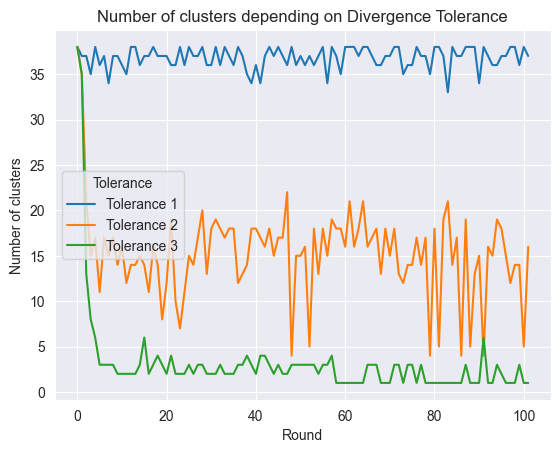

In [81]:
ax = sns.lineplot(training_cluster_count.reset_index(), x="round_id", y="cluster_count", hue="label")

plt.ylabel("Number of clusters")
plt.xlabel("Round")
plt.title("Number of clusters depending on Divergence Tolerance")
plt.legend(title="Tolerance")

savefig(plt, "n_clusters")
plt.show()

In [82]:

selection_cluster_count = selection_cluster_count.reset_index()

cluster_death_rate = training_cluster_count.reset_index().merge(selection_cluster_count , on=["round_id", "label"], suffixes=("_training", "_selection"))

In [83]:
cluster_death_rate["survival_rate"] = cluster_death_rate["cluster_count_training"] / cluster_death_rate["cluster_count_selection"]

In [84]:
cluster_death_rate

,round_id,label,cluster_count_training,cluster_count_selection,survival_rate
0,1.0,Tolerance 1,37,28,1.321429
1,1.0,Tolerance 2,35,28,1.250000
2,1.0,Tolerance 3,35,28,1.250000
3,2.0,Tolerance 1,37,27,1.370370
4,2.0,Tolerance 2,21,21,1.000000
...,...,...,...,...,...
298,100.0,Tolerance 2,5,18,0.277778
299,100.0,Tolerance 3,1,1,1.000000
300,101.0,Tolerance 1,37,27,1.370370
301,101.0,Tolerance 2,16,17,0.941176


<AxesSubplot: xlabel='round_id', ylabel='survival_rate'>

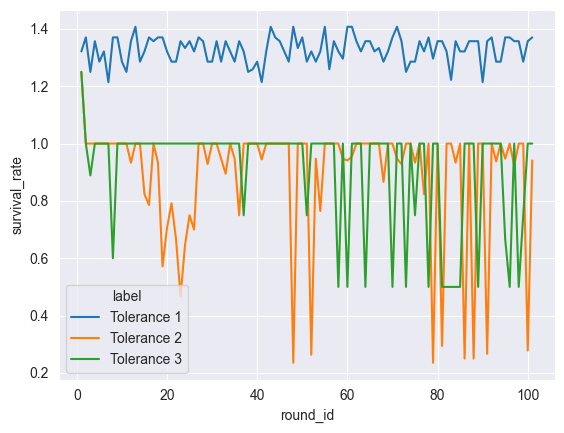

In [85]:
sns.lineplot(cluster_death_rate, x="round_id", y="survival_rate", hue="label")